#Практическая работа №2

##1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets as ds

from timeit import default_timer as timer

import warnings
warnings.filterwarnings('ignore')

In [80]:
#формируем исходные данные
X, y = ds.make_regression(n_samples=1000, n_features=3, random_state=49)
#добавляем первой единичную колонку
X = np.column_stack((np.ones(X.shape[0]),X))
X.shape

(1000, 4)

In [81]:
def calc_mse(y, y_pred, W=0):
    err = np.mean((y_pred-y)**2)
    return err

def grad_mse(X, y_err, W=0):
  return (1/X.shape[1] * 2 * np.dot(y_err, X))

In [82]:
def eval_model(X, y, iterations, err_call, grad_call, alpha=1e-4, eps=None, errors=None):
    W = np.random.randn(X.shape[1])
    err = np.inf
    for i in range(1, iterations+1):
      err_last = err
      y_pred = np.dot(X, W)
      err = err_call(y, y_pred, W)
      W -= (alpha * grad_call(X, y_pred - y, W))
      if errors is not None:
        errors.append(err)
      if eps is not None:
        if np.abs(err-err_last) < eps:
          break
    return W, i, err

In [83]:
def sgd_model(X, y, iterations, err_call, grad_call, batch_size=1, alpha=1e-4, eps=None, errors=None):
    W = np.random.randn(X.shape[1])
    err = np.inf
    for i in range(1, iterations+1):
      batch=np.random.randint(X.shape[0], size=batch_size)
      err_last = err
      y_pred = np.dot(X[batch], W)
      err = err_call(y[batch], y_pred, W)
      W -= (alpha * grad_call(X[batch], y_pred - y[batch], W))
      if errors is not None:
        errors.append(err)
      if eps is not None:
        if np.abs(err-err_last) < eps:
          break
    return W, i, err

In [84]:
# Визуализируем изменение функционала ошибки
def plot(err1, err2):
  plt.plot(range(len(err1)), err1, color='g')
  plt.plot(range(len(err2)), err2, color='r')
  plt.title('MSE')
  plt.xlabel('Iteration number')
  plt.ylabel('MSE')

(array([7.64185454e-16, 6.23976588e+01, 2.89634502e+01, 8.71363344e+01]), 100, 9.381242835948933e-29)
(array([ 1.58672647, 47.88398713, 21.81054338, 64.77402857]), 100, 833.6758875861655)


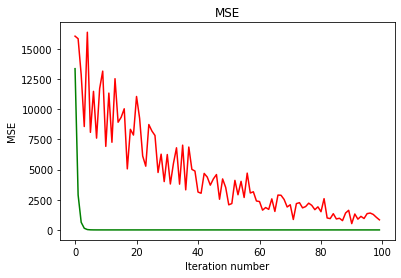

In [85]:
errors1=[]
print(eval_model(X, y, 100, calc_mse, grad_mse, alpha=0.001, errors=errors1))

errors2=[]
print(sgd_model(X, y, 100, calc_mse, grad_mse, batch_size=25, alpha=0.001, errors=errors2))

plot(errors1, errors2)

__Сходимость стахостического градиентного спуска хуже, но ресурсов он (в теории) потребляет меньше__

##2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [86]:
def calc_mse_l2(lambda_ = 1e-2):
  def calc_mse_l2_(y, y_pred, W):
    err = np.mean((y_pred - y)**2)+lambda_/2 * np.mean(W**2)
    return err
  return calc_mse_l2_ 

def grad_mse_l2(lambda_ = 1e-2):
  def grad_mse_l2_(X, y_err, W):
    return (1/X.shape[1] * 2 * np.dot(y_err, X) + lambda_ * W)
  return grad_mse_l2_

(array([8.49955666e-16, 6.23976588e+01, 2.89634502e+01, 8.71363344e+01]), 1000, 8.997717152757943e-29)
(array([1.44491311e-04, 6.23917182e+01, 2.89609251e+01, 8.71281728e+01]), 1000, 77.01749161378656)


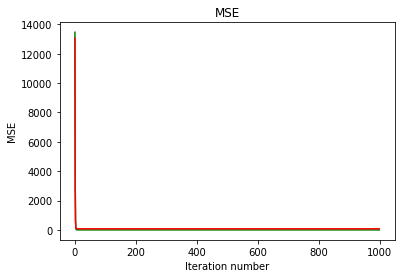

In [87]:
errors1=[]
print(eval_model(X, y, 1000, calc_mse, grad_mse, alpha=0.001, errors=errors1))

errors2=[]
print(eval_model(X, y, 1000, calc_mse_l2(lambda_=0.05), grad_mse_l2(lambda_=0.05), alpha=0.001, errors=errors2))

plot(errors1, errors2)

__С L2-регулиризацией остается значительная ошибка после значительного количества итераций обучения, т.е. модель сложнее переобучить__

##3 [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [89]:
def calc_mse_l1(lambda_ = 1e-2):
  def calc_mse_l1_(y, y_pred, W):
    err = np.mean((y_pred - y)**2)+lambda_* np.mean(np.abs(W))
    return err
  return calc_mse_l1_


(array([9.30256401e-16, 6.23976588e+01, 2.89634502e+01, 8.71363344e+01]), 1000, 44.624360851591376)
(array([1.44491311e-04, 6.23917182e+01, 2.89609251e+01, 8.71281728e+01]), 1000, 77.01749161378656)


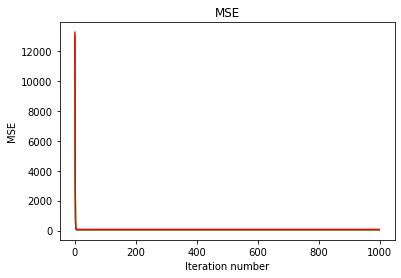

In [93]:
errors1=[]
print(eval_model(X, y, 1000, calc_mse_l1(lambda_=1), grad_mse, alpha=0.001, errors=errors1))

errors2=[]
print(eval_model(X, y, 1000, calc_mse_l2(lambda_=0.05), grad_mse_l2(lambda_=0.05), alpha=0.001, errors=errors2))

plot(errors1, errors2)